In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score , recall_score ,f1_score , accuracy_score , confusion_matrix , classification_report

In [75]:
df=pd.read_excel("Bike Sales Sheet.xlsx")

In [76]:
df.head()

,ID,Marriedarital Singletatus,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age brachets,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,invalid,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,invalid,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,invalid,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,more than 10 miles,Pacific,41,invalid,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,invalid,Yes


In [77]:
df_encoded = pd.get_dummies(df, columns=["Gender", "Home Owner","Marriedarital Singletatus", "Education", "Occupation", "Region", "Age brachets", "Commute Distance"])
df_encoded


,ID,Income,Children,Cars,Age,Purchased Bike,Gender_Female,Gender_Male,Home Owner_No,Home Owner_Yes,...,Region_Europe,Region_North America,Region_Pacific,Age brachets_adolscent,Age brachets_invalid,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_more than 10 miles
0,12496,40000,1,0,42,No,True,False,False,True,...,True,False,False,False,True,True,False,False,False,False
1,24107,30000,3,1,43,No,False,True,False,True,...,True,False,False,False,True,True,False,False,False,False
2,14177,80000,5,2,60,No,False,True,True,False,...,True,False,False,False,True,False,False,False,True,False
3,24381,70000,0,1,41,Yes,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
4,25597,30000,0,0,36,Yes,False,True,True,False,...,True,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,16466,20000,0,2,32,Yes,True,False,True,False,...,True,False,False,False,True,True,False,False,False,False
1022,19273,20000,2,0,63,No,True,False,False,True,...,True,False,False,False,True,True,False,False,False,False
1023,22400,10000,0,1,26,Yes,False,True,True,False,...,False,False,True,True,False,True,False,False,False,False
1024,20942,20000,0,1,31,No,True,False,True,False,...,True,False,False,False,True,False,False,False,False,True


In [78]:
df_encoded.head()

,ID,Income,Children,Cars,Age,Purchased Bike,Gender_Female,Gender_Male,Home Owner_No,Home Owner_Yes,...,Region_Europe,Region_North America,Region_Pacific,Age brachets_adolscent,Age brachets_invalid,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_more than 10 miles
0,12496,40000,1,0,42,No,True,False,False,True,...,True,False,False,False,True,True,False,False,False,False
1,24107,30000,3,1,43,No,False,True,False,True,...,True,False,False,False,True,True,False,False,False,False
2,14177,80000,5,2,60,No,False,True,True,False,...,True,False,False,False,True,False,False,False,True,False
3,24381,70000,0,1,41,Yes,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
4,25597,30000,0,0,36,Yes,False,True,True,False,...,True,False,False,False,True,True,False,False,False,False


In [79]:
df_encoded=df_encoded.drop(columns=["ID"])

In [80]:
df_corr=df_encoded.drop(columns=["Purchased Bike"])
df_corr.corr()

,Income,Children,Cars,Age,Gender_Female,Gender_Male,Home Owner_No,Home Owner_Yes,Marriedarital Singletatus_Married,Marriedarital Singletatus_Single,...,Region_Europe,Region_North America,Region_Pacific,Age brachets_adolscent,Age brachets_invalid,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_more than 10 miles
Income,1.000000,0.261285,0.421921,0.168551,-0.058630,0.058630,-0.021540,0.021540,0.084436,-0.084436,...,-0.320742,0.207296,0.111738,-0.259344,0.259344,-0.163232,-0.070485,0.211858,0.059325,0.044059
Children,0.261285,1.000000,0.257447,0.530475,0.002055,-0.002055,-0.158914,0.158914,0.147665,-0.147665,...,-0.119618,0.139639,-0.036699,-0.359463,0.359463,-0.123620,0.002973,0.182132,0.033485,-0.027211
Cars,0.421921,0.257447,1.000000,0.181302,-0.055894,0.055894,0.079860,-0.079860,-0.021286,0.021286,...,-0.236997,0.065307,0.193040,-0.022264,0.022264,-0.313269,0.011442,0.322541,-0.068652,0.179901
Age,0.168551,0.530475,0.181302,1.000000,-0.001262,0.001262,-0.113866,0.113866,0.209822,-0.209822,...,-0.085934,0.070405,0.011245,-0.499114,0.499114,-0.167666,-0.018771,0.203743,-0.036857,0.095487
Gender_Female,-0.058630,0.002055,-0.055894,-0.001262,1.000000,-1.000000,0.009809,-0.009809,-0.090223,0.090223,...,0.074739,-0.035327,-0.042354,-0.035578,0.035578,0.050208,0.005475,-0.007339,-0.000563,-0.060374
Gender_Male,0.058630,-0.002055,0.055894,0.001262,-1.000000,1.000000,-0.009809,0.009809,0.090223,-0.090223,...,-0.074739,0.035327,0.042354,0.035578,-0.035578,-0.050208,-0.005475,0.007339,0.000563,0.060374
Home Owner_No,-0.021540,-0.158914,0.079860,-0.113866,0.009809,-0.009809,1.000000,-1.000000,-0.318384,0.318384,...,0.043743,-0.095633,0.069459,0.147898,-0.147898,0.107317,0.102831,-0.101624,-0.022606,-0.128147
Home Owner_Yes,0.021540,0.158914,-0.079860,0.113866,-0.009809,0.009809,-1.000000,1.000000,0.318384,-0.318384,...,-0.043743,0.095633,-0.069459,-0.147898,0.147898,-0.107317,-0.102831,0.101624,0.022606,0.128147
Marriedarital Singletatus_Married,0.084436,0.147665,-0.021286,0.209822,-0.090223,0.090223,-0.318384,0.318384,1.000000,-1.000000,...,-0.063864,0.098397,-0.049574,-0.131155,0.131155,0.035393,-0.016460,0.015824,-0.030462,-0.011968
Marriedarital Singletatus_Single,-0.084436,-0.147665,0.021286,-0.209822,0.090223,-0.090223,0.318384,-0.318384,-1.000000,1.000000,...,0.063864,-0.098397,0.049574,0.131155,-0.131155,-0.035393,0.016460,-0.015824,0.030462,0.011968


In [81]:
filter_corr= df_corr.corr()[(df_corr.corr() >= 0.5) | (df_corr.corr() <= -0.5 )]
filter_corr

,Income,Children,Cars,Age,Gender_Female,Gender_Male,Home Owner_No,Home Owner_Yes,Marriedarital Singletatus_Married,Marriedarital Singletatus_Single,...,Region_Europe,Region_North America,Region_Pacific,Age brachets_adolscent,Age brachets_invalid,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_more than 10 miles
Income,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Children,NaN,1.000000,NaN,0.530475,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cars,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,0.530475,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender_Female,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender_Male,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Owner_No,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Owner_Yes,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marriedarital Singletatus_Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marriedarital Singletatus_Single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


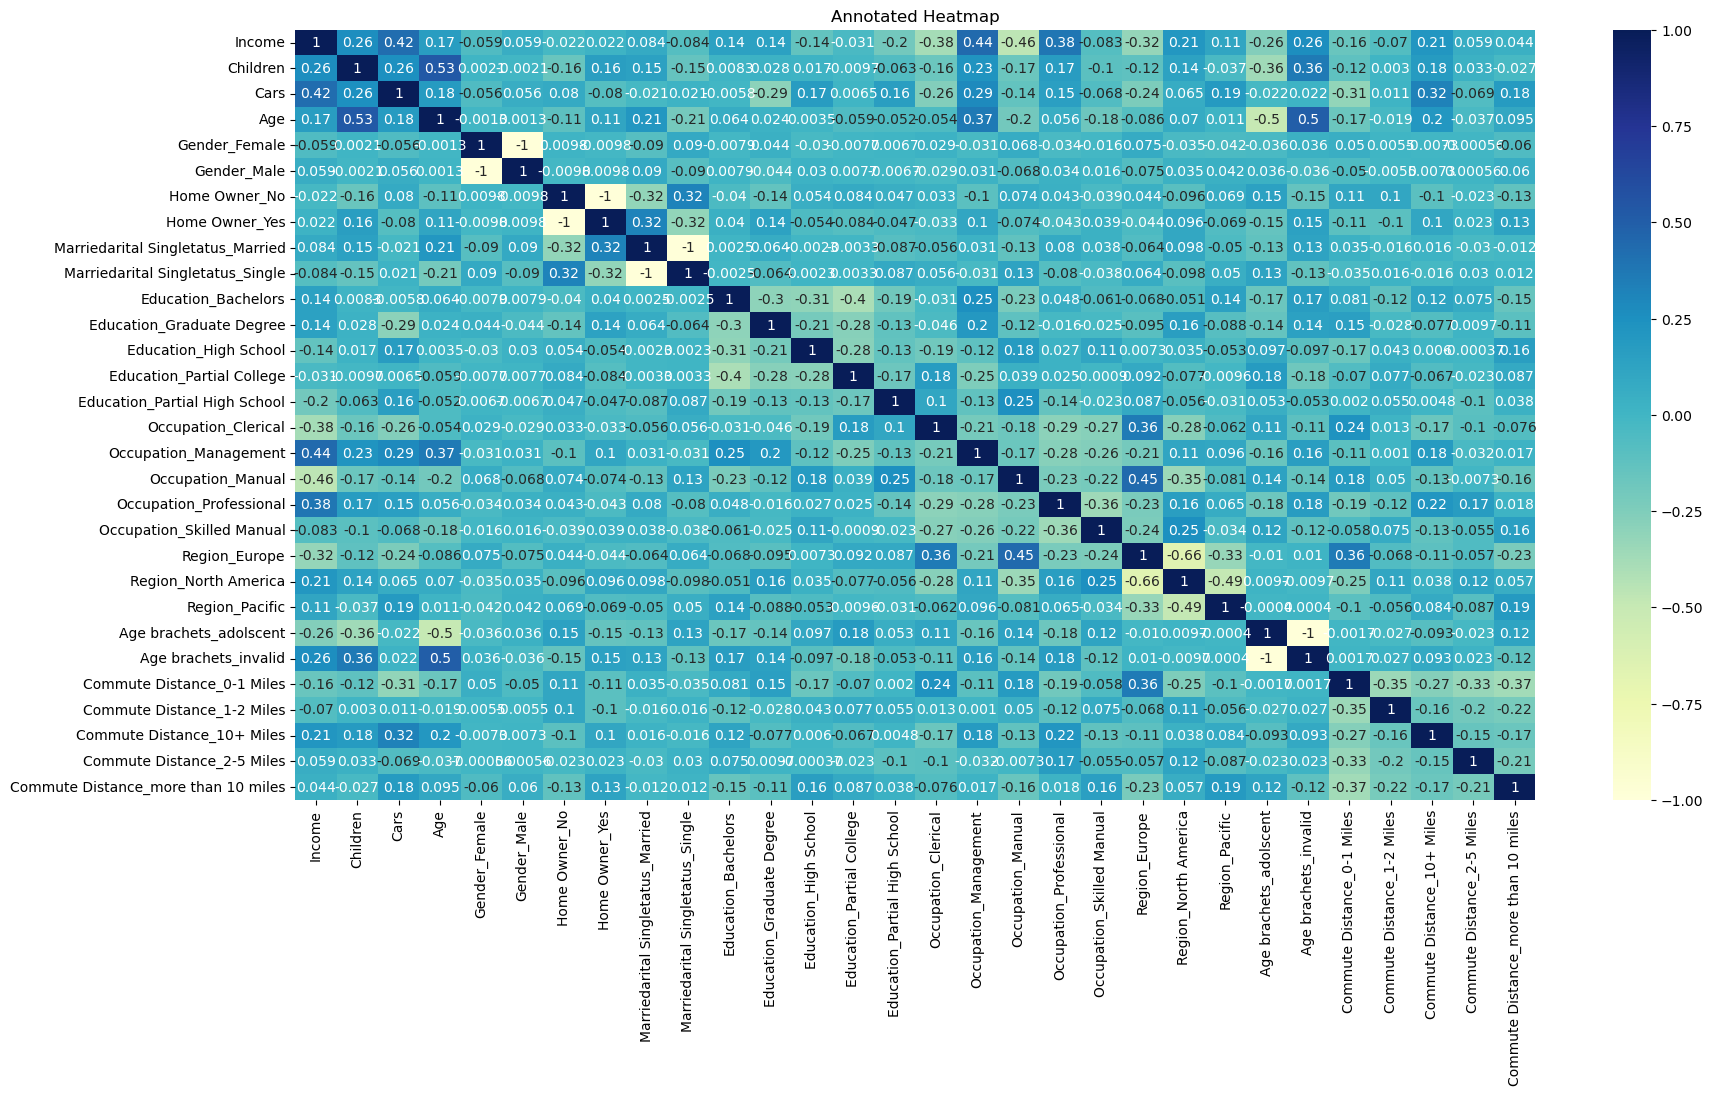

In [82]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_corr.corr(), annot=True ,annot_kws=dict(size=10), cmap='YlGnBu')

plt.title('Annotated Heatmap')

plt.show()







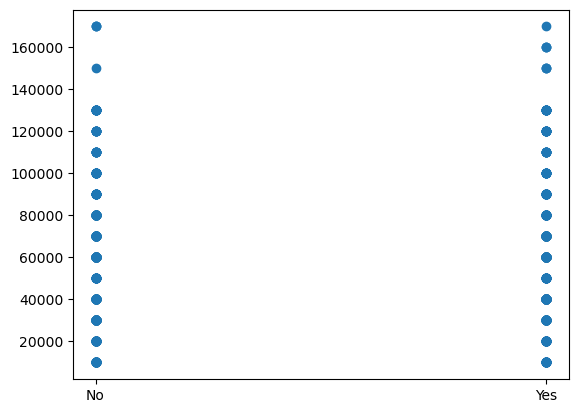

In [83]:
y=df["Purchased Bike"]
plt.scatter(y,df_encoded["Income"])


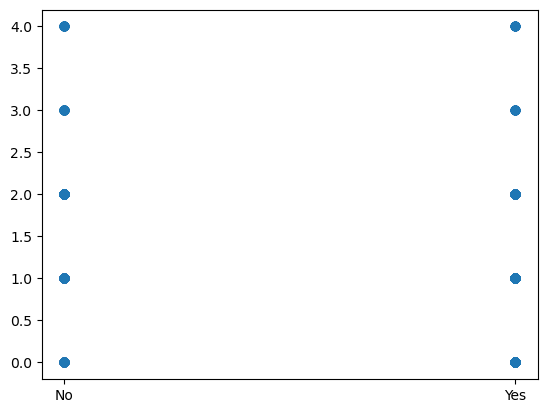

In [84]:
plt.scatter(y,df_encoded["Cars"])

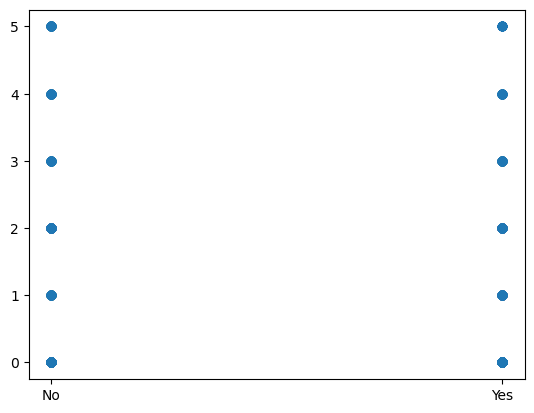

In [85]:
plt.scatter(y,df_encoded["Children"])

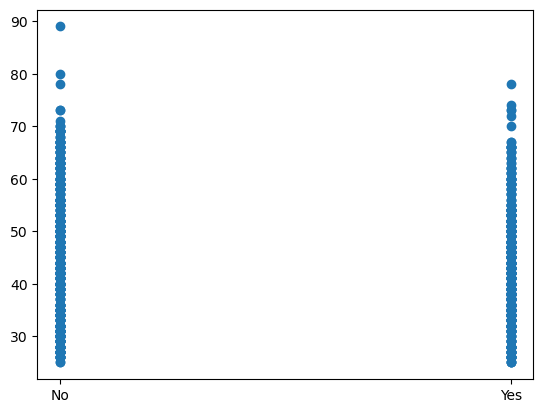

In [86]:
plt.scatter(y,df_encoded["Age"])

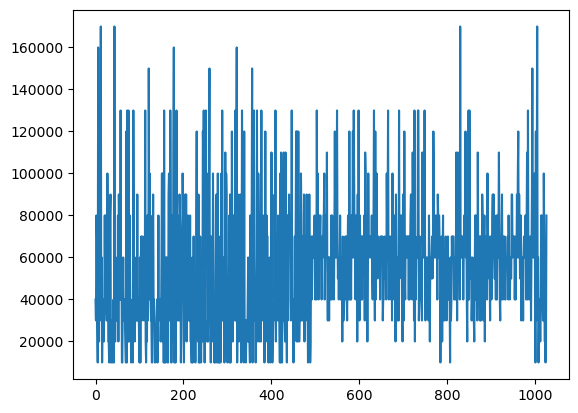

In [87]:
plt.plot(df_encoded["Income"])

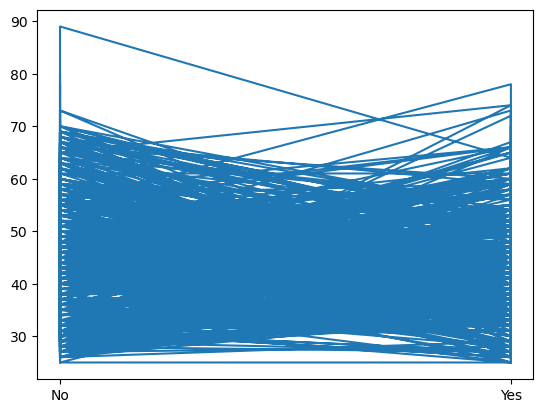

In [88]:
plt.plot(y,df_encoded["Age"])

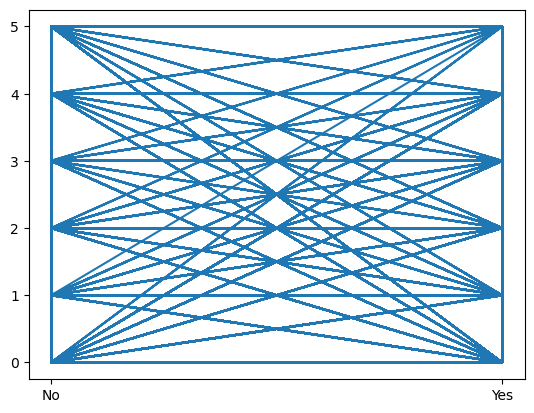

In [89]:
plt.plot(y,df_encoded["Children"])

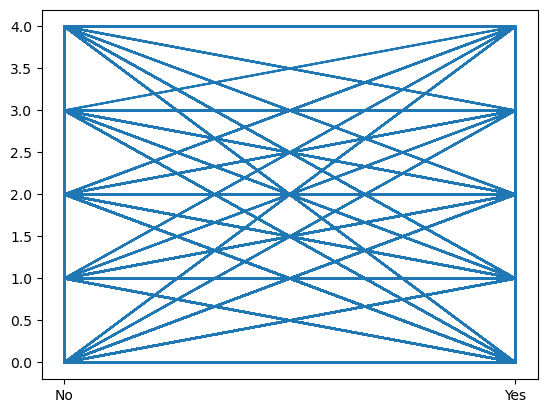

In [90]:
plt.plot(y,df_encoded["Cars"])

<BarContainer object of 1026 artists>

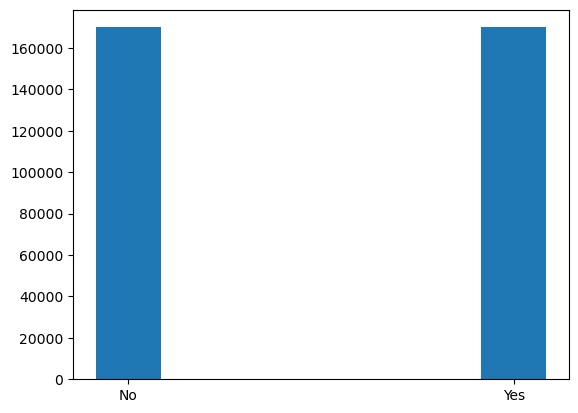

In [91]:
# y=[(df_encoded["Purchased Bike_No"]) & (df_encoded["Purchased Bike_Yes"])]

plt.bar(y,df_encoded["Income"],width=0.17)

<BarContainer object of 1026 artists>

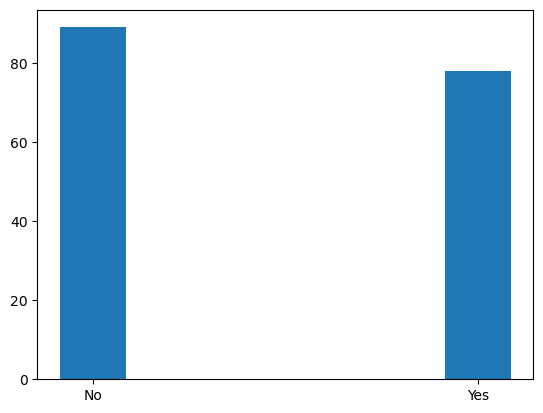

In [92]:
plt.bar(y,df_encoded["Age"],width=0.17)

<BarContainer object of 1026 artists>

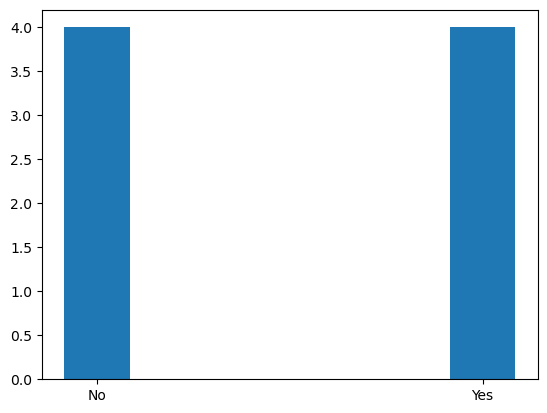

In [93]:
plt.bar(y,df_encoded["Cars"],width=0.17)

<BarContainer object of 1026 artists>

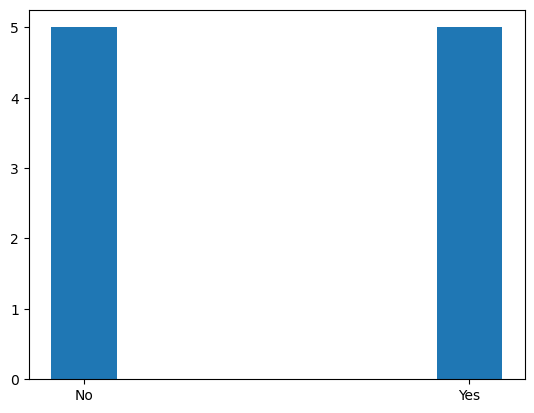

In [94]:
plt.bar(y,df_encoded["Children"],width=0.17)

<Axes: xlabel='Income', ylabel='Count'>

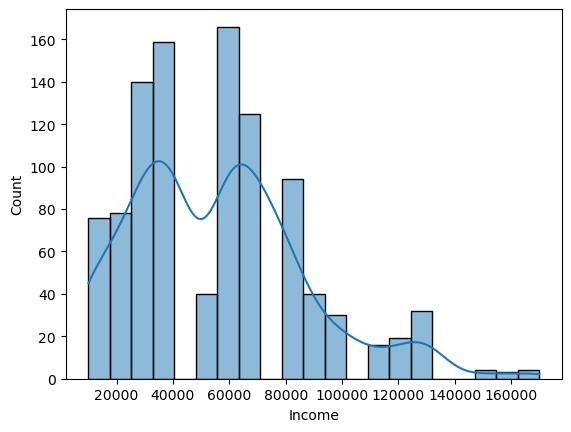

In [95]:
sns.histplot(df_encoded["Income"],kde=True)

<Axes: xlabel='Children', ylabel='Count'>

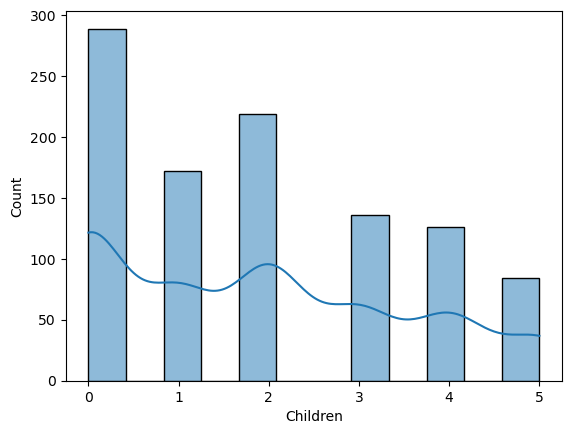

In [96]:
sns.histplot(df_encoded["Children"],kde=True)

<Axes: xlabel='Cars', ylabel='Count'>

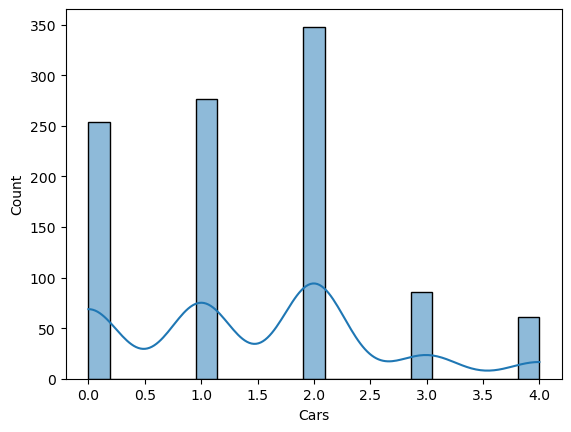

In [97]:
sns.histplot(df_encoded["Cars"],kde=True)

<Axes: xlabel='Age', ylabel='Count'>

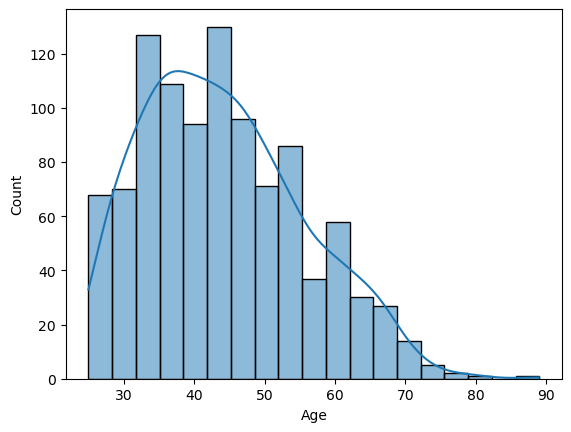

In [98]:
sns.histplot(df_encoded["Age"],kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdc61cd220>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdc61cd7f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1cdc61b3bc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdc61cde20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdc61ce120>],
 'means': []}

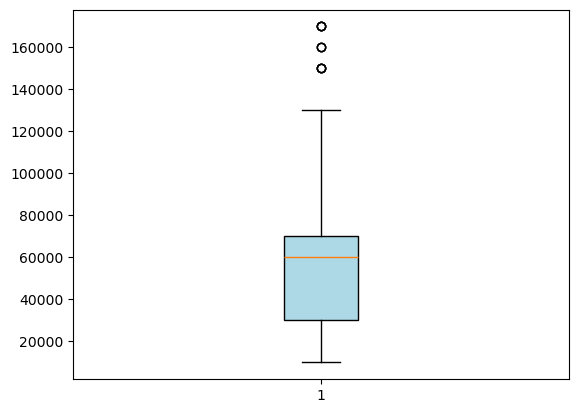

In [99]:
plt.boxplot(df_encoded["Income"] , patch_artist=True, boxprops=dict(facecolor='lightblue'))

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdc6240560>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdc6240b00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1cdc6240230>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdc61ce990>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdc5f3dd60>],
 'means': []}

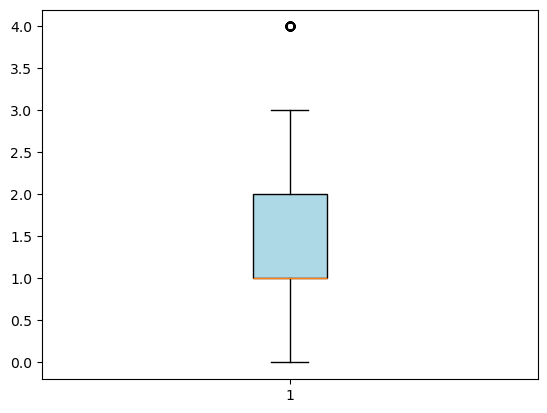

In [100]:
plt.boxplot(df_encoded["Cars"] , patch_artist=True, boxprops=dict(facecolor='lightblue'))

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdc626a180>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdc62b4050>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1cdc627b890>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdc62b4620>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdc62b48f0>],
 'means': []}

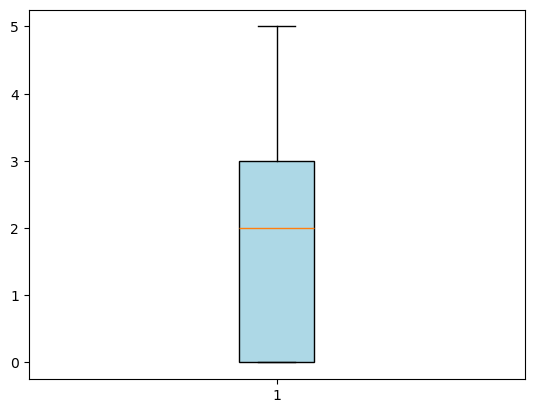

In [101]:
plt.boxplot(df_encoded["Children"] , patch_artist=True, boxprops=dict(facecolor='lightblue'))

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdc62f9460>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdc62f9a00>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1cdc62f9100>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdc62f9f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdc62fa270>],
 'means': []}

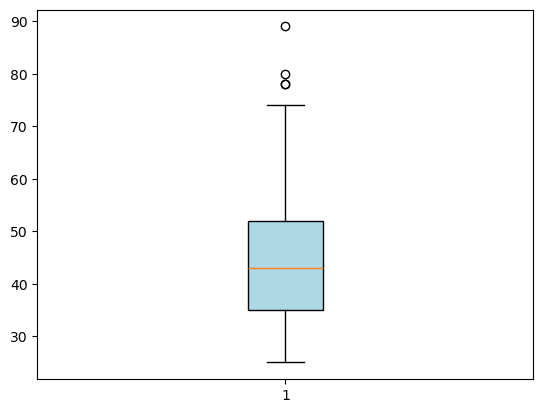

In [102]:
plt.boxplot(df_encoded["Age"] , patch_artist=True, boxprops=dict(facecolor='lightblue'))

From these insights, we can identify potential outliers based on common statistical rules, such as the interquartile range (IQR) or z-scores. Here's how you can proceed:

Determine the IQR for each column:
IQR = Q3 - Q1 (where Q3 is the 75th percentile and Q1 is the 25th percentile).

Identify outliers using the IQR method:
Outliers fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [103]:
outliers=df_encoded[(df["Income"]>130000) | (df["Children"]>7.5) | (df["Cars"] > 3.5 )| (df["Age"] < 9.5 ) | (df["Age"]>77.5)]


In [104]:
len(outliers)

72

In [105]:
dd=df_encoded[(df_encoded["Income"]<=130000) & (df_encoded["Children"]<=7.5) & (df_encoded["Cars"] <= 3.5) & (df_encoded["Age"] >= 9.5 ) & (df_encoded["Age"]<=77.5)]

In [106]:
len(dd)

954

In [107]:
df_encoded.describe()

,Income,Children,Cars,Age
count,1026.000000,1026.000000,1026.000000,1026.000000
mean,56208.576998,1.892788,1.437622,44.138402
std,31293.284007,1.626670,1.125538,11.349282
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


In [108]:
dd.describe()

,Income,Children,Cars,Age
count,954.000000,954.000000,954.000000,954.000000
mean,52180.293501,1.853249,1.271488,43.906709
std,27242.353867,1.603856,0.947014,11.240512
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,0.000000,35.000000
50%,50000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,51.750000
max,130000.000000,5.000000,3.000000,74.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1cdc7462c30>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdc7463260>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdc7462960>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdc74637d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdc7463a40>],
 'means': []}

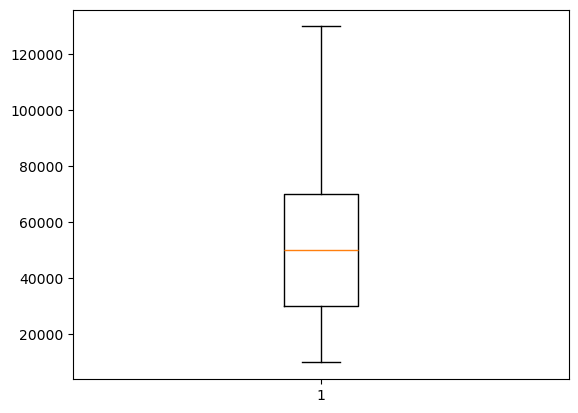

In [109]:
plt.boxplot(dd["Income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdc74d0d70>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdc74d1340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdc74d0a70>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdc74d1940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdc74d1c10>],
 'means': []}

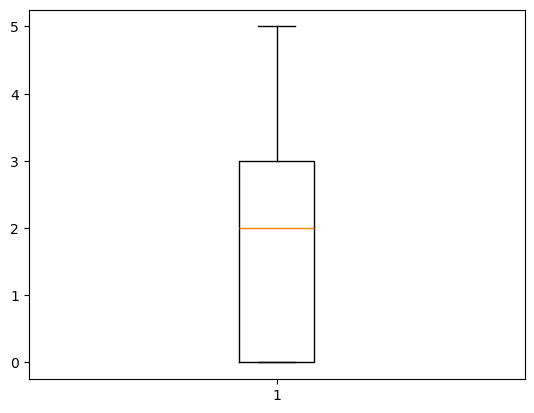

In [110]:
plt.boxplot(dd["Children"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdc751ec30>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdc751f200>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdc751e930>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdc751f740>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdc751fa10>],
 'means': []}

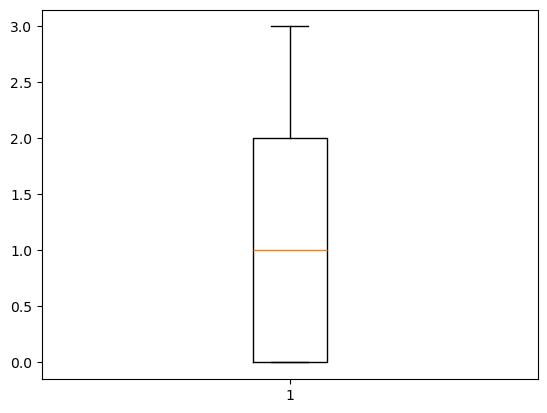

In [111]:
plt.boxplot(dd["Cars"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdc63853a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdc6385970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdc6358a10>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdc6385f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdc6386270>],
 'means': []}

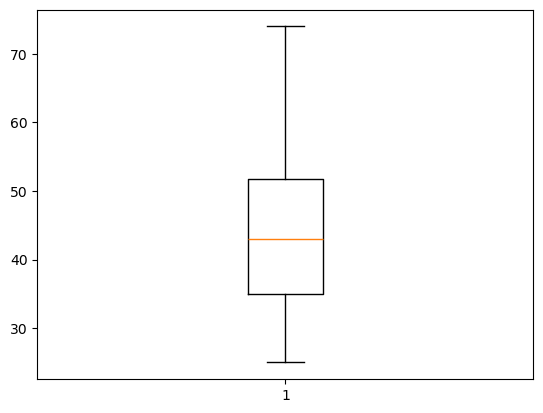

In [112]:
plt.boxplot(dd["Age"])

In [113]:
#other method to detect outliers using IQR in padnas



Q1 = df_encoded["Income"].quantile(0.25)
Q3 = df_encoded["Income"].quantile(0.75)
IQR = Q3 - Q1

# Correctly calculate outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df_encoded["Income"] < lower_bound) | (df_encoded["Income"]> upper_bound)
outliers[outliers==True].index


Index([6, 12, 43, 121, 178, 259, 321, 356, 829, 993, 1004], dtype='int64')

In [114]:
#other method to detect outliers using IQR in padnas
outliers[6]


True

In [115]:
#other method to detect outliers using z-score in spicy.stats
from scipy.stats import zscore
z_scores = df_corr.apply(zscore)
outliers = (z_scores < -3) | (z_scores > 3)
outliers[outliers==True].index

RangeIndex(start=0, stop=1026, step=1)

In [116]:
f=[(z_scores > -3) & (z_scores < 3)]

In [117]:
f

[      Income  Children  Cars   Age  Gender_Female  Gender_Male  Home Owner_No  \
 0       True      True  True  True           True         True           True   
 1       True      True  True  True           True         True           True   
 2       True      True  True  True           True         True           True   
 3       True      True  True  True           True         True           True   
 4       True      True  True  True           True         True           True   
 ...      ...       ...   ...   ...            ...          ...            ...   
 1021    True      True  True  True           True         True           True   
 1022    True      True  True  True           True         True           True   
 1023    True      True  True  True           True         True           True   
 1024    True      True  True  True           True         True           True   
 1025    True      True  True  True           True         True           True   
 
       Home Ow

In [118]:
df_encoded

,Income,Children,Cars,Age,Purchased Bike,Gender_Female,Gender_Male,Home Owner_No,Home Owner_Yes,Marriedarital Singletatus_Married,...,Region_Europe,Region_North America,Region_Pacific,Age brachets_adolscent,Age brachets_invalid,Commute Distance_0-1 Miles,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_more than 10 miles
0,40000,1,0,42,No,True,False,False,True,True,...,True,False,False,False,True,True,False,False,False,False
1,30000,3,1,43,No,False,True,False,True,True,...,True,False,False,False,True,True,False,False,False,False
2,80000,5,2,60,No,False,True,True,False,True,...,True,False,False,False,True,False,False,False,True,False
3,70000,0,1,41,Yes,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
4,30000,0,0,36,Yes,False,True,True,False,False,...,True,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,20000,0,2,32,Yes,True,False,True,False,False,...,True,False,False,False,True,True,False,False,False,False
1022,20000,2,0,63,No,True,False,False,True,True,...,True,False,False,False,True,True,False,False,False,False
1023,10000,0,1,26,Yes,False,True,True,False,True,...,False,False,True,True,False,True,False,False,False,False
1024,20000,0,1,31,No,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True


In [119]:
# y=dd["Purchased Bike"]
# label_encoder = LabelEncoder()
# y= label_encoder.fit_transform(y)
# plt.figure(figsize=(10,6))
# plt.pie(x=y ,labels=["Yes","No"], autopct="%1.1f%%")
# plt.show()

In [120]:
y=dd["Purchased Bike"].values
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)
df2=dd.drop(columns=["Purchased Bike"]).values
scaler=StandardScaler()
x= scaler.fit_transform(df2)
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)



In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y , test_size=0.1, random_state=21)

In [122]:
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=500 , random_state=21),
    "Decision Tree": DecisionTreeClassifier(criterion="gini", random_state=0),
    "Random Forest": RandomForestClassifier( n_estimators=100,max_depth=None,min_samples_split=2,random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "BernoulliNB (NB)":BernoulliNB()
}

results = {}
for name, model in classification_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy}")


Logistic Regression: Accuracy = 0.75
Decision Tree: Accuracy = 0.71875
Random Forest: Accuracy = 0.78125
K-Nearest Neighbors (KNN): Accuracy = 0.7395833333333334
BernoulliNB (NB): Accuracy = 0.6875


In [123]:
rf_model=RandomForestClassifier( n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [124]:
dt_model=DecisionTreeClassifier(criterion="gini",random_state=0)
dt_model.fit(x_train,y_train)
y_pred_2=dt_model.predict(x_test)

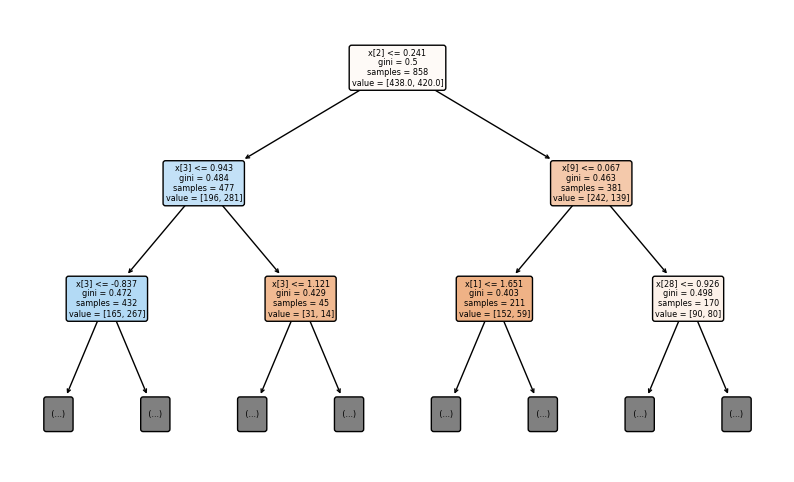

In [125]:
plt.figure(figsize=(10, 6))
plot_tree(dt_model, filled=True, rounded=True,max_depth=2)
plt.show()

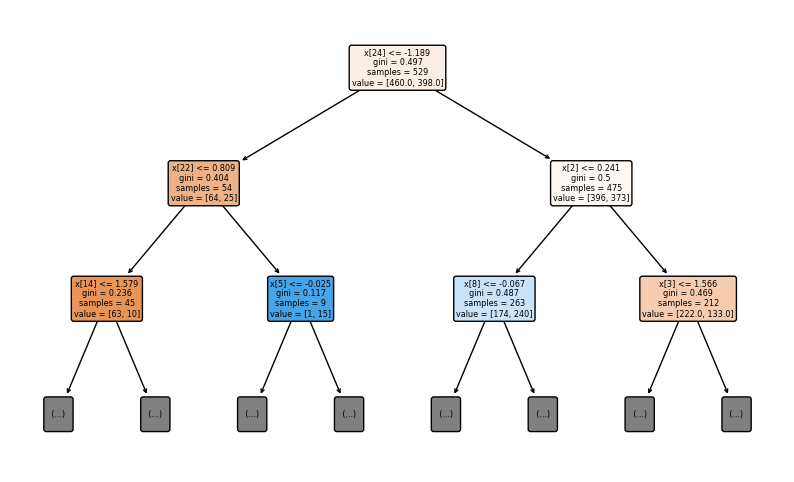

In [126]:
plt.figure(figsize=(10, 6))
plot_tree(rf_model[3], filled=True, rounded=True,max_depth=2)
plt.show()


In [127]:
print(f"model score = {rf_model.score(x_test,y_test)}")
print(f"precision = {precision_score(y_test,y_pred)}")
print(f"recall = {recall_score(y_test,y_pred)}")
print(f"f1 = {f1_score(y_test,y_pred)}")
print(f"accuracy = {accuracy_score(y_test,y_pred)}")
print(f"confusion matrix= {confusion_matrix(y_test,y_pred)}\n")
print(f""" classification reprot :\n
{classification_report(y_test,y_pred,target_names=[ "No","yes"])}
""")



model score = 0.78125
precision = 0.813953488372093
recall = 0.7291666666666666
f1 = 0.7692307692307693
accuracy = 0.78125
confusion matrix= [[40  8]
 [13 35]]

 classification reprot :

              precision    recall  f1-score   support

          No       0.75      0.83      0.79        48
         yes       0.81      0.73      0.77        48

    accuracy                           0.78        96
   macro avg       0.78      0.78      0.78        96
weighted avg       0.78      0.78      0.78        96




In [128]:
print(f"model score = {dt_model.score(x_test,y_test)}")
print(f"precision = {precision_score(y_test,y_pred_2)}")
print(f"recall = {recall_score(y_test,y_pred_2)}")
print(f"f1 = {f1_score(y_test,y_pred_2)}")
print(f"accuracy = {accuracy_score(y_test,y_pred_2)}")
print(f"confusion matrix= {confusion_matrix(y_test,y_pred_2)}\v")
print(f""" classification reprot :\n
{classification_report(y_test,y_pred_2,target_names=[ "No","yes"])}
""")



model score = 0.71875
precision = 0.7560975609756098
recall = 0.6458333333333334
f1 = 0.6966292134831461
accuracy = 0.71875
confusion matrix= [[38 10]
 [17 31]]
 classification reprot :

              precision    recall  f1-score   support

          No       0.69      0.79      0.74        48
         yes       0.76      0.65      0.70        48

    accuracy                           0.72        96
   macro avg       0.72      0.72      0.72        96
weighted avg       0.72      0.72      0.72        96




In [129]:
lr_model=LogisticRegression(max_iter=500 , random_state=21)
lr_model.fit(x_train,y_train)
y_pred_3=lr_model.predict(x_test)

In [130]:
print(f"model score = {lr_model.score(x_test,y_test)}")
print(f"precision = {precision_score(y_test,y_pred_3)}")
print(f"recall = {recall_score(y_test,y_pred_3)}")
print(f"f1 = {f1_score(y_test,y_pred_3)}")
print(f"accuracy = {accuracy_score(y_test,y_pred_3)}")
print(f"confusion matrix= {confusion_matrix(y_test,y_pred_3)}\n")
print(f""" classification reprot :\n
{classification_report(y_test,y_pred_3,target_names=[ "No","yes"])}
""")


model score = 0.75
precision = 0.7608695652173914
recall = 0.7291666666666666
f1 = 0.7446808510638298
accuracy = 0.75
confusion matrix= [[37 11]
 [13 35]]

 classification reprot :

              precision    recall  f1-score   support

          No       0.74      0.77      0.76        48
         yes       0.76      0.73      0.74        48

    accuracy                           0.75        96
   macro avg       0.75      0.75      0.75        96
weighted avg       0.75      0.75      0.75        96




In [131]:
knn_model=KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(x_train,y_train)
y_pred_4=knn_model.predict(x_test)

In [132]:
print(f"model score = {knn_model.score(x_test,y_test)}")
print(f"precision = {precision_score(y_test,y_pred_4)}")
print(f"recall = {recall_score(y_test,y_pred_4)}")
print(f"f1 = {f1_score(y_test,y_pred_4)}")
print(f"accuracy = {accuracy_score(y_test,y_pred_4)}")
print(f"confusion matrix= {confusion_matrix(y_test,y_pred_4)}\n")
print(f""" classification reprot :\n
{classification_report(y_test,y_pred_4,target_names=[ "No","yes"])}
""")



model score = 0.7395833333333334
precision = 0.7948717948717948
recall = 0.6458333333333334
f1 = 0.7126436781609196
accuracy = 0.7395833333333334
confusion matrix= [[40  8]
 [17 31]]

 classification reprot :

              precision    recall  f1-score   support

          No       0.70      0.83      0.76        48
         yes       0.79      0.65      0.71        48

    accuracy                           0.74        96
   macro avg       0.75      0.74      0.74        96
weighted avg       0.75      0.74      0.74        96




In [133]:
NB_model=BernoulliNB()
NB_model.fit(x_train,y_train)
y_pred_5=knn_model.predict(x_test)

In [134]:
print(f"model score = {NB_model.score(x_test,y_test)}")
print(f"precision = {precision_score(y_test,y_pred_5)}")
print(f"recall = {recall_score(y_test,y_pred_5)}")
print(f"f1 = {f1_score(y_test,y_pred_5)}")
print(f"accuracy = {accuracy_score(y_test,y_pred_5)}")
print(f"confusion matrix= {confusion_matrix(y_test,y_pred_5)}\n")
print(f""" classification reprot :\n
{classification_report(y_test,y_pred_5,target_names=[ "No","yes"])}
""")


model score = 0.6875
precision = 0.7948717948717948
recall = 0.6458333333333334
f1 = 0.7126436781609196
accuracy = 0.7395833333333334
confusion matrix= [[40  8]
 [17 31]]

 classification reprot :

              precision    recall  f1-score   support

          No       0.70      0.83      0.76        48
         yes       0.79      0.65      0.71        48

    accuracy                           0.74        96
   macro avg       0.75      0.74      0.74        96
weighted avg       0.75      0.74      0.74        96




In [136]:
def predict_purchased():
        l=[]    
        l.append(int(input("what's your income" )))
        l.append(int(input("what's your age" )))
        l.append(int(input("how many cars you have?" )))
        l.append(int(input("how many children you have?" )))
        l.append(bool(int(input("Are you male? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you female? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have a home? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Don't you have a home ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you married ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you single ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have bachelor degree ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have garduate degree ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have high school degree ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have partial college degree ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have partial high degree ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have Occupation_Clerical ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have Occupation_management ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have Occupation_manaual ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have Occupation_professional ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you have Occupation_skilled manual ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you european? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you north american ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you Pacific ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Are you Age brachets_adolscent ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Age brachets_invalid ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you Commute Distance_0-1 Miles ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you Commute Distance_1-2 Miles ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you Commute Distance_10+ Miles ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you Commute Distance_2-5 Miles ? (1 for Yes, 0 for No): "))))
        l.append(bool(int(input("Do you Commute Distance_more than 10 miles ? (1 for Yes, 0 for No): "))))
        a=np.array(l).reshape(1, -1)
        scaler=StandardScaler()
        h=scaler.fit_transform(a)
        r=LogisticRegression(max_iter=500 , random_state=21)
        r.fit(x_train,y_train)
        if r.predict(h)[0]==1 :
            print(f"the customer is predicted to buy a bike ")
        else :
            print(f"the customer isn't predicted to buy a bike ")
         
                 
        

In [137]:
predict_purchased()

what's your income 12345
what's your age 30
how many cars you have? 1
how many children you have? 0
Are you male? (1 for Yes, 0 for No):  1
Are you female? (1 for Yes, 0 for No):  0
Do you have a home? (1 for Yes, 0 for No):  1
Don't you have a home ? (1 for Yes, 0 for No):  0
Are you married ? (1 for Yes, 0 for No):  1
Are you single ? (1 for Yes, 0 for No):  0
Do you have bachelor degree ? (1 for Yes, 0 for No):  1
Do you have garduate degree ? (1 for Yes, 0 for No):  0
Do you have high school degree ? (1 for Yes, 0 for No):  0
Do you have partial college degree ? (1 for Yes, 0 for No):  0
Do you have partial high degree ? (1 for Yes, 0 for No):  0
Do you have Occupation_Clerical ? (1 for Yes, 0 for No):  1
Do you have Occupation_management ? (1 for Yes, 0 for No):  0
Do you have Occupation_manaual ? (1 for Yes, 0 for No):  0
Do you have Occupation_professional ? (1 for Yes, 0 for No):  0
Do you have Occupation_skilled manual ? (1 for Yes, 0 for No):  0
Are you european? (1 for Yes, 

the customer isn't predicted to buy a bike 


In [148]:
bike_purchases=df_encoded['Purchased Bike'].value_counts()

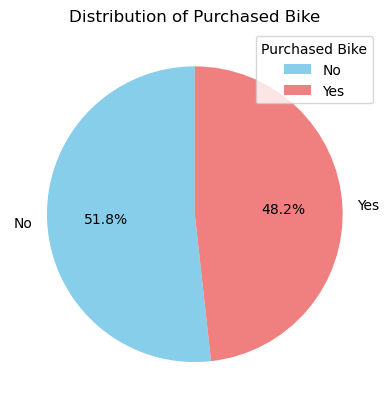

In [149]:
bike_purchases.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Purchased Bike')
plt.ylabel('')  # Removes the y-label for a cleaner look
plt.legend(labels=bike_purchases.index, title='Purchased Bike', loc='upper right')
plt.show()